# Identify working and data directory and site ID.
* The working directory is the root directory of the github.
* The data directory points to the google drive folder where the larger data files are stored.
* For the moment the site ID if the four-digit NEON site ID.

In [13]:
working<-"~/neon_suna"
working_data<-"/Users/jhosen/gdrive/SUNA_Data/"
site_id<-"CRAM"
#data<-paste("~/gdrive/SUNA_Data/SUNA_NEON/",site_id,"/2019",sep="")
data<-paste(working_data,"/SUNA_NEON/CRAM_2019/",sep="")

save<-paste(working_data,"/corrected_files/",sep="")

# Initialize required libraries, functions and formatting utilities.

In [2]:
library(dplyr)
library(streamMetabolizer)
library(splitstackshape)
library(ggplot2)
library(lubridate)
library(reshape2)
library(neonUtilities)
library(progress)
library(patchwork)
library(doBy)
library(stringr)
#library(box)

theme_ts_space<-theme_grey() +
		theme(
#		panel.grid.major = element_blank(),
#		panel.grid.minor = element_blank(),
		panel.background = element_rect(fill="white", colour="black", size=2),
#		legend.key       = element_blank(),
#		legend.text      = element_text(size=20.5),
#		legend.text      = element_blank(),
#		legend.title     = element_text(size=20.5),
		axis.text.x = element_text(size=22,colour="black",hjust=1,angle=45),
		axis.text.y = element_text(size=22,colour="black",vjust=.3),
		axis.title.x = element_text(size=22),
		axis.title.y = element_text(size=22,vjust=-1),
#		plot.title = element_text(hjust = 0.5,size=22,face="bold"),		
#		legend.position  = "left",
		legend.position  = "none",
		plot.margin = unit(c(1,1,1,1), "cm"),
		panel.border = element_rect(colour = "black", fill=NA, size=2)
		)






Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


USGS Active Research Package:
https://owi.usgs.gov/R/packages.html#research

This package was developed for research purposes. We used it for our
own applications and welcome flexible, resilient users who can help us
test and improve the package. Please give us feedback at
https://github.com/USGS-R/streamMetabolizer/issues/new.


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘doBy’


The following object is masked from ‘package:dplyr’:

    order_by




# Setting up the workspace
In the cell below indicate the site that will be analyzed here according to its NEON 4-letter code. A list of files for that site is then placed in the vector "sunas".

If you downloaded the repo into your home director, which is found by going to "~/", then you don"t have to change the box path. FYI: Box is a new package for R that allows you to define a set of functions without creating a new package.

In [3]:

#setwd(paste("~/gdrive/SUNA_data/SUNA_NEON/",site_id,sep=""))
#sunas<-list.files(pattern="*.csv")
#getwd()
#options(box.path = "~/neon_suna/box/")
#box::use(plots)

setwd(data)
sunas<-list.files(pattern="*.CSV")

#suna_cal<-readRDS("/Users/jhosen/gdrive/fdom/SUNA Calibration pdfs/suna_cal_comb.rds")
#suna_cal<-read.csv("/Users/jhosen/gdrive/SUNA_Data/SUNA Calibration pdfs/suna_0839_20190312.csv")
#suna_cal_t<-as.data.frame(t(suna_cal))
#names(suna_cal_t)<-suna_cal_t[1,]

# Data import and processing loop.
This step loads each data file, formats the data for use, and concatenates files from an individual site.

This step could take a while.

In [10]:
paste("/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/CRAM_2019/cal_files/",cal,"_abbr.csv",sep="")

[1] "/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/LIRO_2019/cal_files/SNA1073H_abbr.csv"

In [14]:
cal
paste("/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/CRAM_2019/cal_files/",cal,"_abbr.csv",sep="")
sunas[i]

[1] "SNA0639G"

[1] "/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/CRAM_2019/cal_files/SNA0639G_abbr.csv"

[1] "D2019282.CSV"

In [ ]:
#suna_d0_norm<-sweep(suna2,2,FUN="/",offse)


In [15]:
options(warn=-1)
compiled_suna<-data.frame()
sunas_length<-length(sunas)
for(i in 1:sunas_length){
#i<-1
print(i)


suna_calid<-read.csv(paste(sunas[i]),skip=0,header=FALSE)
cal<-str_extract(suna_calid,"[SNA]{3}[0-9]{4}[a-zA-Z]{1}")
cal<-cal[!is.na(cal)]
    
    
suna<-read.csv(paste(sunas[i]),skip=30,header=FALSE)

if(cal!="SNA0639A"){suna_cal<-read.csv(paste("/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/CRAM_2019/cal_files/",cal,"_abbr.csv",sep=""))}else{
    suna_cal<-read.csv("/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/CRAM_2019/CAL_files/SNA0639E_abbr.csv")}



    
    
suna_cal_t<-as.data.frame(t(suna_cal))
names(suna_cal_t)<-suna_cal_t[1,]

#suna_d0<-cSplit(suna,3, ",")
names(suna)<-c("suna_id","date","time","nitrate","nitrate_mgl","a254","a350","bromide_trace","spec_average_dark","dark_signal_average","int_time",suna_cal$wavelength_nm,"sensor_temp","spec_temp","lamp_temp","lamp_time","rel_hum","main_volt","lamp_volt","int_volt","main_current","fit_aux_1","fit_aux_2","fit_base_1","fit_base_2","fit_RMSE","CTD_Time","CTD_Salinity","CTD_Temp","CTD_Pressure","checksum")

    
#suna<-subset(suna,a254!=0)

suna<-subset(suna,a254!=0)
    
#year<-substr(suna$date, 1, 4)
if(grepl("D2019",sunas[i])==TRUE){
year<-"2019"
doy<-gsub(".CSV","",gsub("D2019","",paste(sunas[i]),fixed=TRUE),fixed=TRUE)
}
    
if(grepl("D2020",sunas[i])==TRUE){
year<-"2020"
doy<-gsub(".CSV","",gsub("D2020","",paste(sunas[i]),fixed=TRUE),fixed=TRUE)
}

day<-as.POSIXct(paste(as.Date(as.numeric(doy)-1,origin=paste(year,"-01-01",sep="")),"00:00:00"),tz="UTC")
#suna$day<-as.POSIXct("2019-05-10 00:00:00",tz="UTC")
suna$dtp<-day + (3600*as.numeric(suna$time))
#attr(suna$dtp,"tzone") <- "Etc/GMT+8"

    

offse<-c(t(suna_cal_t[3,]))
suna2<-(suna[,12:267]/suna$int_time)-suna$dark_signal_average
suna_d0_norm<-sweep(suna2,2,FUN="/",offse)
names(suna_d0_norm)<-paste("n_",names(suna_cal_t),sep="")

    

#print("test")
suna_d0_int<-data.frame()
for(j in 1:nrow(suna_d0_norm)){	
#    print(j)
    if(!is.na(suna_d0_norm[j,1])){
	flip<-as.data.frame(t(suna_d0_norm[j,]))
	names(flip)<-c("abs")
	flip$wl_nm<-gsub("n_","",row.names(flip),fixed=TRUE)
	flip_int<-as.data.frame(t(approx(flip$wl_nm,flip$abs,xout=seq(189,394,1),rule=2)$y))
	names(flip_int)<-paste("interp_",seq(189,394,1),sep="")
	suna_d0_int<-bind_rows(suna_d0_int,flip_int)
    }else{
        flip_int[1,]<-NA
       	suna_d0_int<-bind_rows(suna_d0_int,flip_int)
    }
}
suna_d<-bind_cols(suna,suna_d0_int)
#suna_d$date<-as.character(suna_d[,c("date")])
#suna_d$time<-as.character(suna_d[,c("time")])
suna_d2<-suna_d %>% mutate_if(is.numeric,as.character)
compiled_suna<-bind_rows(compiled_suna,suna_d2)
}
print("done")
options(warn=0)    
    
    
    


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] "done"


# Check Data and Save

In [16]:
#head(compiled_suna)
#grepl("D2020",sunas[240])
#sunas[240]
#length(sunas)
#sunas[240]
#ncol(compiled_suna)
#nrow(compiled_suna)
#names(compiled_suna)<-gsub("inter_time","int_time",names(compiled_suna),fixed=TRUE)
#saveRDS(compiled_suna,"/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/CRAM_2019/CRAM_corrected/SUNA_CRAM_20210428_full.rds")
#saveRDS(compiled_suna,paste(save,"/SUNA_Cor/","SUNA_CRAM_2019_20210701_full.rds",sep=""))
compiled_suna<-readRDS("/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/CRAM_2019/CRAM_corrected/SUNA_CRAM_20210428_full.rds")


# Extracting the interpolated columns

In [17]:
compiled_suna$cal<-"SNA1073"

suna_interp<-compiled_suna[,grepl("^inter",names(compiled_suna))] %>% mutate_if(is.character, ~as.numeric(.))
#head(suna_interp)

other_suna<-compiled_suna[,c("suna_id","date","time","nitrate","nitrate_mgl","a254","a350","bromide_trace","spec_average_dark","dark_signal_average","int_time","sensor_temp","spec_temp","lamp_temp","lamp_time","rel_hum","main_volt","lamp_volt","int_volt","main_current","fit_aux_1","fit_aux_2","fit_base_1","fit_base_2","fit_RMSE","CTD_Time","CTD_Salinity","CTD_Temp","CTD_Pressure","checksum","cal","dtp")]

suna_cols<-bind_cols(other_suna,suna_interp)
suna_cols$a254<-as.numeric(suna_cols$a254)
suna_cols$a350<-as.numeric(suna_cols$a350)
suna_cols$nitrate<-as.numeric(suna_cols$nitrate)
suna_cols$nitrate_mgl<-as.numeric(suna_cols$nitrate_mgl)
suna_cols$sensor_temp<-as.numeric(suna_cols$sensor_temp)


In [ ]:
range(suna_cols$a254)
range(suna_cols$interp_254)
suna_cols$interp_254
names(suna_cols)

In [18]:
suna_cols<-subset(suna_cols,a350<10 & a254<10)
a350_mod<-lm(a350~log10(interp_350)+I(log10(interp_350)^2)+I(log10(interp_350)^3),suna_cols)
a254_mod<-lm(a254~log10(interp_254+0.6)+I(log10(interp_254+0.6)^2)+I(log10(interp_254+0.6)^3),suna_cols)



cor_cols<-grep("^interp_",names(suna_cols))



Call:
lm(formula = a254 ~ log10(interp_254 + 0.6) + I(log10(interp_254 + 
    0.6)^2) + I(log10(interp_254 + 0.6)^3), data = suna_cols)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.037438 -0.000189 -0.000117  0.000050  0.020518 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    0.12560    0.00425   29.55   <2e-16 ***
log10(interp_254 + 0.6)        2.38195    0.07741   30.77   <2e-16 ***
I(log10(interp_254 + 0.6)^2) -24.69285    0.46364  -53.26   <2e-16 ***
I(log10(interp_254 + 0.6)^3)  48.32326    0.90984   53.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001461 on 170247 degrees of freedom
Multiple R-squared:  0.9857,	Adjusted R-squared:  0.9857 
F-statistic: 3.914e+06 on 3 and 170247 DF,  p-value: < 2.2e-16


      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-3.744e-02 -1.892e-04 -1.166e-04  0.000e+00  4.991e-05  2.052e-02 


Call:
lm(formula = a350 ~ log10(interp_350) + I(log10(interp_350)^2) + 
    I(log10(interp_350)^3), data = suna_cols)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.042055 -0.000095 -0.000025  0.000034  0.026471 

Coefficients:
                         Estimate Std. Error   t value Pr(>|t|)    
(Intercept)            -1.043e-04  5.266e-06   -19.815  < 2e-16 ***
log10(interp_350)      -9.929e-01  4.109e-04 -2416.167  < 2e-16 ***
I(log10(interp_350)^2)  2.531e-01  3.055e-02     8.284  < 2e-16 ***
I(log10(interp_350)^3)  1.266e+00  2.278e-01     5.558 2.73e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001715 on 170247 degrees of freedom
Multiple R-squared:  0.9741,	Adjusted R-squared:  0.9741 
F-statistic: 2.131e+06 on 3 and 170247 DF,  p-value: < 2.2e-16


      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-4.206e-02 -9.515e-05 -2.550e-05  0.000e+00  3.398e-05  2.647e-02 

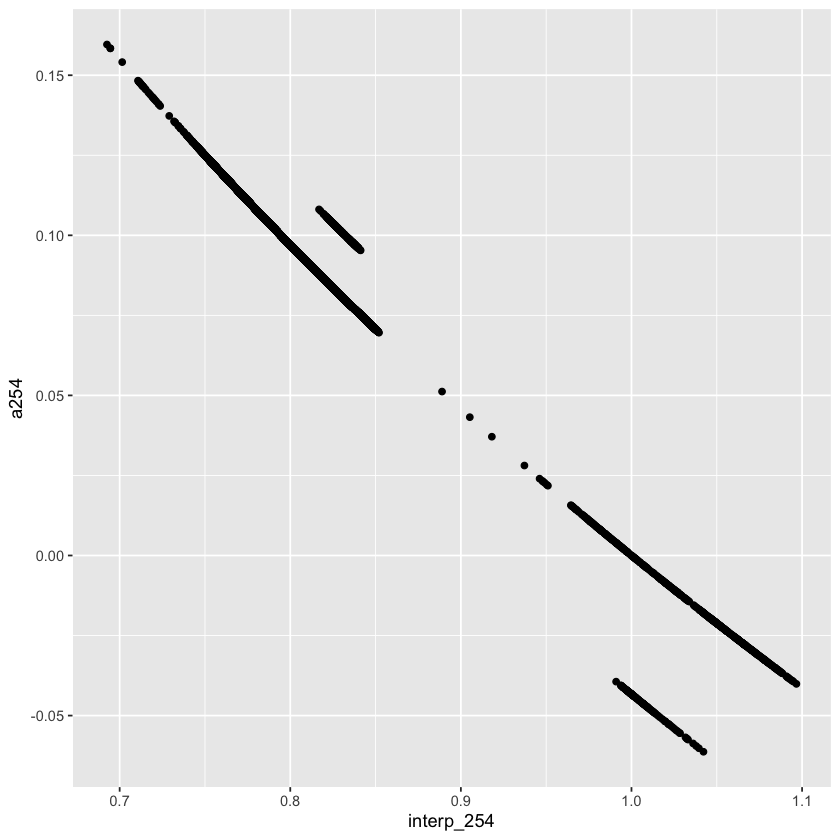

In [19]:
ggplot(suna_cols,aes(interp_254,a254))+geom_point()

summary(a254_mod)
summary(resid(a254_mod))

summary(a350_mod)
summary(resid(a350_mod))

In [22]:
suna_cols$interp_254[abs(resid(a254_mod))>0.02]<-NA
suna_cols$interp_350[abs(resid(a350_mod))>0.02]<-NA

a350_mod<-lm(a350~log10(interp_350)+I(log10(interp_350)^2)+I(log10(interp_350)^3),suna_cols)
a254_mod<-lm(a254~log10(interp_254)+I(log10(interp_254)^2)+I(log10(interp_254)^3),suna_cols)


summary(a350_mod)
summary(a254_mod)


Call:
lm(formula = a350 ~ log10(interp_350) + I(log10(interp_350)^2) + 
    I(log10(interp_350)^3), data = suna_cols)

Residuals:
       Min         1Q     Median         3Q        Max 
-3.161e-04 -4.722e-05 -2.600e-07  4.709e-05  3.281e-04 

Coefficients:
                         Estimate Std. Error    t value Pr(>|t|)    
(Intercept)            -1.226e-04  2.143e-07   -572.044   <2e-16 ***
log10(interp_350)      -9.996e-01  1.674e-05 -59717.448   <2e-16 ***
I(log10(interp_350)^2) -1.030e-02  1.243e-03     -8.287   <2e-16 ***
I(log10(interp_350)^3) -1.265e-01  9.265e-03    -13.649   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.973e-05 on 169708 degrees of freedom
  (539 observations deleted due to missingness)
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.3e+09 on 3 and 169708 DF,  p-value: < 2.2e-16



Call:
lm(formula = a254 ~ log10(interp_254) + I(log10(interp_254)^2) + 
    I(log10(interp_254)^3), data = suna_cols)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.180e-04 -2.513e-05  9.900e-08  2.514e-05  9.025e-05 

Coefficients:
                         Estimate Std. Error    t value Pr(>|t|)    
(Intercept)             1.756e-05  1.153e-06     15.238  < 2e-16 ***
log10(interp_254)      -1.000e+00  3.156e-05 -31702.613  < 2e-16 ***
I(log10(interp_254)^2) -1.838e-03  7.203e-04     -2.552  0.01070 *  
I(log10(interp_254)^3) -1.212e-02  4.082e-03     -2.970  0.00298 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.146e-05 on 169708 degrees of freedom
  (539 observations deleted due to missingness)
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 7.788e+09 on 3 and 169708 DF,  p-value: < 2.2e-16


In [23]:
options(warn=-1)


#compiled_suna2[,c(cor_cols)]<-compiled_suna2[,c(cor_cols)] %>% mutate_if(is.character,as.numeric)

for(i in 1:length(cor_cols)){
	prepdata<-data.frame(interp_350=suna_cols[,cor_cols[i]],interp_254=suna_cols[,cor_cols[i]])
	a350_pred<-predict(a350_mod,newdata=prepdata)
	a254_pred<-predict(a254_mod,newdata=prepdata)
	suna_cols[,c(paste(names(suna_cols)[cor_cols[i]],"_c350",sep=""))]<-a350_pred
	suna_cols[,c(paste(names(suna_cols)[cor_cols[i]],"_c254",sep=""))]<-a254_pred
}

options(warn=0)

Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in unique.default(c("AsIs", oldClass(x))):
“NaNs produced”
Warning message in unique.default(c("AsIs", oldClass(x))):
“NaNs produced”
Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in unique.default(c("AsIs", oldClass(x))):
“NaNs produced”
Warning message in unique.default(c("AsIs", oldClass(x))):
“NaNs produced”
Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in unique.default(c("AsIs", oldClass(x))):
“NaNs produced”
Warning message in unique.default(c("AsIs", oldClass(x))):
“NaNs produced”
Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in unique.default(c("AsIs", oldClass(x))):
“NaNs produced”
Warning message in unique.default(c("AsIs", oldClass(x))):
“NaNs produced”
Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in unique.default(c("AsIs", oldClass(x))):
“NaNs produced”
Warning message

# Reducing data down to 15 minutes intervals.
We want to average down each burst from the SUNA to a single value and mac sure that these values are snapped to 15 minutes intervals (e.g., rather than round up or down to 14 or 16).

In [32]:
head(suna_cols)

,suna_id,date,time,nitrate,nitrate_mgl,a254,a350,bromide_trace,spec_average_dark,dark_signal_average,⋯,interp_390_c350,interp_390_c254,interp_391_c350,interp_391_c254,interp_392_c350,interp_392_c254,interp_393_c350,interp_393_c254,interp_394_c350,interp_394_c254
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,SATSLF0826,2019008,19.50993,2.61,0.0366,0.0306,0.0114,0,20907,702,⋯,0.02911972,0.04154632,0.02926755,0.04171810,0.02980688,0.04234434,0.02957566,0.04207595,0.02986802,0.04241528
2,SATSLF0826,2019008,19.510179,2.60,0.0364,0.0308,0.0116,0,20912,702,⋯,0.02848754,0.04081113,0.02871603,0.04107697,0.02891937,0.04131343,0.02957114,0.04207070,0.02983783,0.04238025
3,SATSLF0826,2019008,19.510431,2.46,0.0345,0.0315,0.0119,0,20889,702,⋯,0.02926352,0.04171341,0.02921627,0.04165851,0.02940175,0.04187399,0.02967892,0.04219582,0.03007945,0.04266054
4,SATSLF0826,2019008,19.510679,2.55,0.0357,0.0313,0.0114,0,20903,702,⋯,0.02881315,0.04118992,0.02875822,0.04112604,0.02902418,0.04143527,0.02913880,0.04156849,0.02965675,0.04217009
5,SATSLF0826,2019008,19.510931,2.41,0.0337,0.0307,0.0109,0,20923,702,⋯,0.02831094,0.04060557,0.02876912,0.04113871,0.02887746,0.04126470,0.02927846,0.04173077,0.02947580,0.04195999
6,SATSLF0826,2019008,19.511179,2.34,0.0327,0.0305,0.0102,0,20930,702,⋯,0.02834919,0.04065010,0.02856133,0.04089698,0.02866802,0.04102111,0.02843703,0.04075234,0.02878319,0.04115507


In [24]:
#rm(compiled_suna)
#rm(compiled_suna_1)
#rm(compiled_suna_2)

suna_cols$dtpr<-lubridate::round_date(suna_cols$dtp, "15 minutes")
suna_red<-summaryBy(.~dtpr,suna_cols,FUN=c(mean))



In [ ]:
#unique(as.Date(suna_red$dtpr))

# Downloading turbidity time series data from NEON.
Data product DP1.20288.001 for general water quality sonde data.

In [25]:
CRAM_wqs<-loadByProduct(dpID="DP1.20288.001",site="CRAM",check.size=F)
saveRDS(CRAM_wqs,paste(data,"/CRAM_wqs.rds",sep=""))
CRAM_wqs<-readRDS(paste(data,"/CRAM_wqs.rds",sep=""))


Finding available files
  |======================================================================| 100%

  |======================================================================| 100%

Unpacking zip files using 1 cores.
Stacking operation across a single core.
Stacking table waq_instantaneous
Stacking table ais_maintenance
Merged the most recent publication of sensor position files for each site and saved to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 2 data tables and 2 metadata tables!
Stacking took 0.870291 secs


In [26]:
CRAM_wqsd<-CRAM_wqs$waq_instantaneous
CRAM_wqsd$dtp<-CRAM_wqsd$startDateTime
CRAM_wqk<-subset(CRAM_wqsd[,c("siteID","dtp","specificConductance","dissolvedOxygen","pH","chlorophyll","turbidity","fDOM")],!is.na(CRAM_wqsd$specificConductance))
#str(CRAM_wqk)

CRAM_wqk$dtpr<-lubridate::round_date(CRAM_wqk$dtp, "15 minutes")
CRAM_wq_red<-summaryBy(.~dtpr,CRAM_wqk,FUN=c(mean))
str(CRAM_wq_red)

'data.frame':	32384 obs. of  7 variables:
 $ dtpr                    : POSIXct, format: "2017-11-01 17:00:00" "2017-11-01 17:15:00" ...
 $ specificConductance.mean: num  15 12.1 12.1 12.1 12.1 ...
 $ dissolvedOxygen.mean    : num  7.37 9.89 9.91 9.92 9.97 ...
 $ pH.mean                 : num  5.63 5.76 5.76 5.76 5.76 ...
 $ chlorophyll.mean        : num  1.69 2.94 2.05 2.01 1.68 ...
 $ turbidity.mean          : num  -1.13 -1.34 -1.31 -1.3 -1.3 ...
 $ fDOM.mean               : num  NA NA NA NA NA NA NA NA NA NA ...


In [27]:
CRAM_sw<-merge(suna_red,CRAM_wq_red,by="dtpr",all.x=TRUE)


In [28]:
head(CRAM_sw)
nrow(CRAM_sw)
save

,dtpr,nitrate.mean,nitrate_mgl.mean,a254.mean,a350.mean,sensor_temp.mean,interp_189.mean,interp_190.mean,interp_191.mean,interp_192.mean,⋯,interp_393_c350.mean,interp_393_c254.mean,interp_394_c350.mean,interp_394_c254.mean,specificConductance.mean,dissolvedOxygen.mean,pH.mean,chlorophyll.mean,turbidity.mean,fDOM.mean
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-07-24 19:45:00,1.7405085,0.02438305,-0.04892203,-0.04723729,22.53898,-0.88537650,-0.86711473,-1.6115833,-0.7408284,⋯,-0.0055103893,-0.0053744330,-0.0056952097,-0.0055593873,11.14000,8.630000,6.526667,5.053333,-6.086667,19.16333
2,2019-07-24 20:00:00,0.5386555,0.00754958,-0.01958908,-0.01986387,23.82605,0.02695359,0.07080264,-0.0503518,0.3413233,⋯,0.0007311911,0.0008721641,0.0007104232,0.0008513795,11.22500,8.675000,6.435000,3.790000,-5.975000,18.87000
3,2019-07-26 14:45:00,3.3020000,0.04628000,0.12246000,0.02936000,23.20000,1.32275276,1.29414115,2.3752479,1.8089321,⋯,0.0152097949,0.0153646082,0.0152033914,0.0153581976,11.15667,8.470000,6.356667,4.746667,-6.026667,20.38000
4,2019-07-26 15:00:00,3.2925000,0.04612000,0.12158500,0.02900000,23.96000,1.31959218,1.21250083,1.8560213,1.5045215,⋯,0.0150452665,0.0151999175,0.0151277668,0.0152825030,11.12333,8.466667,6.343333,5.116667,-5.966667,20.63667
5,2019-07-26 15:15:00,3.2315000,0.04527500,0.12179000,0.02912000,24.17500,1.63498726,1.31812745,2.1362635,1.8903720,⋯,0.0152381119,0.0153929588,0.0152210172,0.0153758475,11.13667,8.466667,6.346667,5.056667,-6.073333,20.64000
6,2019-07-26 15:30:00,3.1765000,0.04449000,0.12231000,0.02941500,24.21500,1.96302464,1.54841388,2.0887683,1.5200534,⋯,0.0152287085,0.0153835457,0.0152954130,0.0154503191,11.14000,8.460000,6.323333,4.936667,-6.040000,20.70000


[1] 8557

[1] "/Users/jhosen/gdrive/SUNA_Data//corrected_files/"

In [29]:
saveRDS(CRAM_sw,paste(save,"/SUNA_sonde_merge/","/CRAM_2019_SUNA_wq.rds",sep=""))

# import and merge NEON water quality grab sample data.

### Downloading grab sample data and saving as rds file in data folder.

In [30]:


library(zoo)
CRAM_wqg<-loadByProduct(dpID="DP1.20093.001",site="CRAM",check.size=F)
saveRDS(CRAM_wqg,paste(data,"/CRAM_wqg.rds",sep=""))
CRAM_wqg<-readRDS(paste(data,"/CRAM_wqg.rds",sep=""))




Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Finding available files
  |======================================================================| 100%

  |======================================================================| 100%

Unpacking zip files using 1 cores.
Stacking operation across a single core.
Stacking table swc_domainLabData
Stacking table swc_externalLabDataByAnalyte
Stacking table swc_fieldData
Stacking table swc_fieldSuperParent
Copied the most recent publication of validation file to /stackedFiles
Copied the most recent publication of categoricalCodes file to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 4 data tables and 3 metadata tables!
Stacking took 0.9446609 secs


### extracting lab analysis data

In [31]:
CRAM_wqg_d<-as.data.frame(CRAM_wqg$swc_externalLabDataByAnalyte)

names(CRAM_wqg_d)

uv_abs<-subset(CRAM_wqg_d,analyte=="UV Absorbance (250 nm)"|analyte=="UV Absorbance (280 nm)")
date_cast<-dcast(uv_abs[,c("analyte","collectDate","analyteConcentration")],collectDate~analyte,value.var="analyteConcentration",mean)
date_cast$dtpr<-lubridate::round_date(date_cast$collectDate, "15 minutes")

names(date_cast)

[1] "uid"                  "domainID"             "siteID"              
 [4] "namedLocation"        "sampleID"             "sampleCode"          
 [7] "startDate"            "collectDate"          "laboratoryName"      
[10] "analyte"              "analyteConcentration" "analyteUnits"        
[13] "coolerTemp"           "remarks"              "shipmentWarmQF"      
[16] "externalLabDataQF"    "sampleCondition"      "publicationDate"     
[19] "release"

[1] "collectDate"            "UV Absorbance (250 nm)" "UV Absorbance (280 nm)"
[4] "dtpr"

In [32]:

suna_grab<-merge(CRAM_sw,date_cast,by="dtpr")

#temp_nitrate_zoo<-zoo(nitrate$nitrate_umL,nitrate$dtp)
#temp_n<-na.approx(temp_nitrate_zoo,xout=suna_red$dtp,na.rm=FALSE)
#suna_grab[,c("UV Absorbance (250 nm)")]
names(suna_grab)<-gsub("UV Absorbance (250 nm)","uva_250_lab",names(suna_grab),fixed=TRUE)
names(suna_grab)<-gsub("UV Absorbance (280 nm)","uva_280_lab",names(suna_grab),fixed=TRUE)



In [33]:
#subset(suna_red,as.Date(dtpr)==as.Date("2019-03-04"))
#as.Date(date_cast$dtpr)
#unique(as.Date(suna_red$dtpr))

#suna_grab
#CRAM_wqg_d

date_cast

collectDate,UV Absorbance (250 nm),UV Absorbance (280 nm),dtpr
<dttm>,<dbl>,<dbl>,<dttm>
2015-05-05 15:30:00,0.1332,0.0858,2015-05-05 15:30:00
2015-05-05 16:30:00,0.1325,0.0846,2015-05-05 16:30:00
2015-05-05 19:45:00,0.1326,0.0850,2015-05-05 19:45:00
2015-05-05 20:45:00,0.1308,0.0843,2015-05-05 20:45:00
2015-06-02 15:00:00,0.1323,0.0850,2015-06-02 15:00:00
2015-06-02 16:00:00,0.1378,0.0902,2015-06-02 16:00:00
2015-06-02 17:15:00,0.1421,0.0941,2015-06-02 17:15:00
2015-06-02 18:15:00,0.1391,0.0908,2015-06-02 18:15:00
2015-06-29 15:15:00,NA,NA,2015-06-29 15:15:00


# Exploring turbidity corrections

In [34]:
#names(suna_grab)
#suna_grab<-subset(suna_grab,!is.na(uva_250_lab)&!is.na(uva_280_lab)&uva_250_lab<2)
suna_grab<-subset(suna_grab,!is.na(uva_250_lab)|!is.na(uva_280_lab))
suna_grab$turbidity.mean[suna_grab$turbidity.mean<=0]<-1
suna_grab[,c("dtpr","a254.mean","uva_250_lab","uva_280_lab","interp_254_c254.mean","turbidity.mean")]

suna_grab$interp_254_log<-log10(suna_grab$interp_254_c254.mean)
suna_grab$turb_log<-log10(suna_grab$turbidity.mean)
nrow(suna_grab)
suna_grab$uva_250_lab
#suna_grab$interp_254_tcorr<-predict(lm(uva_250_lab~interp_254_c254.mean*turbidity.mean,suna_grab))
#suna_grab$interp_254_tcorr_log<-predict(lm(uva_250_lab~interp_254_log*turbidity.mean,suna_grab))
#suna_grab$interp_254_tcorr_log_turb<-predict(lm(uva_250_lab~interp_254_log*turb_log,suna_grab))


saveRDS(suna_grab,paste(save,"/SUNA_grab_merge/","/CRAM_2019_SUNA_wqg.rds",sep=""))

,dtpr,a254.mean,uva_250_lab,uva_280_lab,interp_254_c254.mean,turbidity.mean
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-08-06 15:45:00,0.102540,0.14300000,0.08650000,0.10253843,1.0000000
2,2019-08-06 16:00:00,0.102540,0.16130000,0.10800000,0.10253866,1.0000000
3,2019-09-09 15:00:00,0.074490,0.08726667,0.05836667,0.07448153,NA
4,2019-09-09 15:45:00,0.074770,0.11493333,0.07690000,0.07477721,NA
5,2019-10-01 15:00:00,0.082580,0.14010000,0.09550000,0.08260763,0.3600000
6,2019-10-01 15:00:00,0.082580,0.15400000,0.10320000,0.08260763,0.3600000
7,2019-10-15 14:45:00,0.094265,0.15733333,0.10443333,0.09426429,0.5100000
8,2019-10-15 15:15:00,0.094875,0.15476667,0.10296667,0.09488950,0.5400000
9,2019-11-05 15:30:00,0.084870,0.14230000,0.09420000,0.08488025,0.6233333


[1] 9

[1] 0.14300000 0.16130000 0.08726667 0.11493333 0.14010000 0.15400000 0.15733333
[8] 0.15476667 0.14230000

[1] "/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/SUGG_2019"


Call:
lm(formula = uva_250_lab ~ a254.mean * turb_log, data = suna_grab)

Residuals:
         1          2          5          6          7          8          9 
-0.0091204  0.0091796 -0.0069759  0.0069241  0.0011094 -0.0011581  0.0000414 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)
(Intercept)         0.05585    0.11451   0.488    0.659
a254.mean           0.93885    1.13550   0.827    0.469
turb_log            0.03793    0.29293   0.129    0.905
a254.mean:turb_log -0.83302    3.10247  -0.269    0.806

Residual standard error: 0.009427 on 3 degrees of freedom
Multiple R-squared:  0.3732,	Adjusted R-squared:  -0.2536 
F-statistic: 0.5954 on 3 and 3 DF,  p-value: 0.6597


,uva_250_lab,interp_254_c254.mean
,<dbl>,<dbl>
1,0.1430000,0.10253843
2,0.1613000,0.10253866
5,0.1401000,0.08260763
6,0.1540000,0.08260763
7,0.1573333,0.09426429
8,0.1547667,0.09488950
9,0.1423000,0.08488025


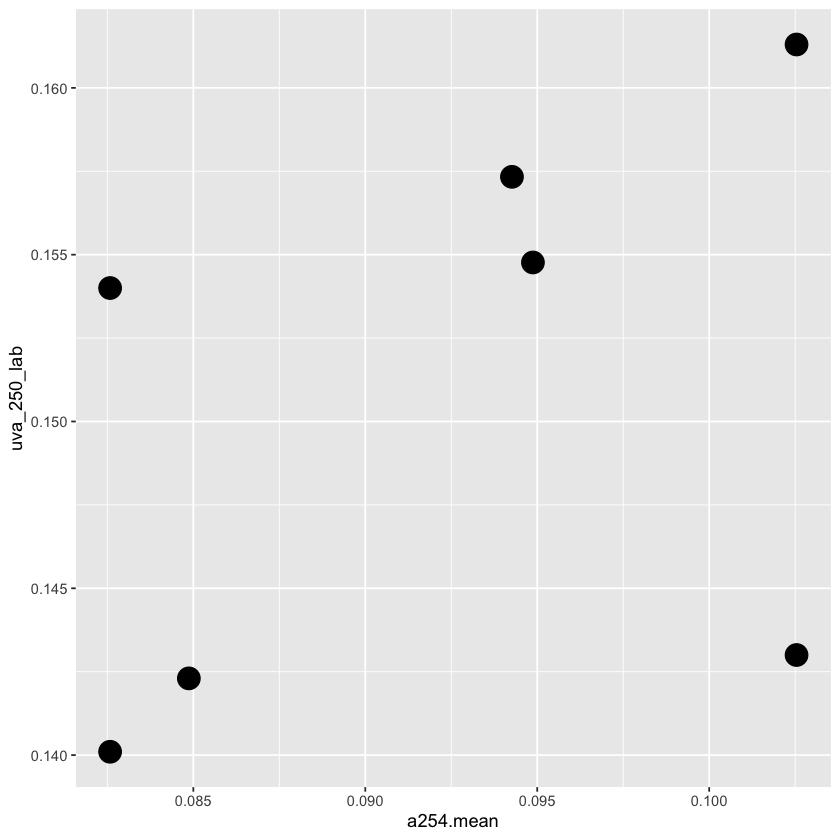

In [35]:
suna_grab<-subset(suna_grab,a254.mean<7 & a254.mean>0 & !is.na(turbidity.mean))

suna_grab$interp_254_log<-log10(suna_grab$interp_254_c254.mean)
suna_grab$turb_log<-log10(suna_grab$turbidity.mean)

#suna_grab$turb_log
summary(lm(uva_250_lab~a254.mean*turb_log,suna_grab))
#summary(lm(uva_250_lab~interp_254_c254.mean*turb_log,suna_grab))

#suna_grab$interp_254_tcorr<-predict(lm(uva_250_lab~interp_254_c254.mean*turbidity.mean,suna_grab))
#suna_grab$interp_254_tcorr_log<-predict(lm(uva_250_lab~interp_254_log*turbidity.mean,suna_grab))
#suna_grab$interp_254_tcorr_log_turb<-predict(lm(uva_250_lab~interp_254_log*turb_log,suna_grab))

suna_grab[,c("uva_250_lab","interp_254_c254.mean")]
ggplot(suna_grab,aes(a254.mean,uva_250_lab))+
#theme_ts_space+
#xlab("\nUV Absorbance at 250 nm (Laboratory)")+
#ylab("UV Absorbance at 250 nm (SUNA Uncorrected)\n")+
geom_point(size=6)




Call:
lm(formula = uva_250_lab ~ interp_254_log * turb_log, data = suna_grab)

Residuals:
         1          2          5          6          7          8          9 
-9.119e-03  9.181e-03 -6.975e-03  6.925e-03  1.113e-03 -1.164e-03  3.848e-05 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)               0.3531     0.2437   1.449    0.243
interp_254_log            0.2032     0.2442   0.832    0.466
turb_log                 -0.1790     0.6766  -0.265    0.809
interp_254_log:turb_log  -0.1361     0.6563  -0.207    0.849

Residual standard error: 0.009428 on 3 degrees of freedom
Multiple R-squared:  0.3731,	Adjusted R-squared:  -0.2537 
F-statistic: 0.5953 on 3 and 3 DF,  p-value: 0.6598



Call:
lm(formula = uva_250_lab ~ interp_254_c254.mean * turb_log, data = suna_grab)

Residuals:
         1          2          5          6          7          8          9 
-9.120e-03  9.180e-03 -6.976e-03  6.924e-03  1.120e-03 -1.167e-03  4.072e-05 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)
(Intercept)                    0.05589    0.11458   0.488    0.659
interp_254_c254.mean           0.93849    1.13614   0.826    0.469
turb_log                       0.03840    0.29337   0.131    0.904
interp_254_c254.mean:turb_log -0.83752    3.10733  -0.270    0.805

Residual standard error: 0.009428 on 3 degrees of freedom
Multiple R-squared:  0.3731,	Adjusted R-squared:  -0.2538 
F-statistic: 0.5951 on 3 and 3 DF,  p-value: 0.6598



Call:
lm(formula = uva_250_lab ~ interp_254_c254.mean, data = suna_grab)

Residuals:
        1         2         5         6         7         8         9 
-0.011613  0.006687 -0.006510  0.007390  0.006043  0.003225 -0.005222 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)           0.11344    0.03598   3.153   0.0253 *
interp_254_c254.mean  0.40156    0.38937   1.031   0.3497  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.008376 on 5 degrees of freedom
Multiple R-squared:  0.1754,	Adjusted R-squared:  0.01048 
F-statistic: 1.064 on 1 and 5 DF,  p-value: 0.3497



Call:
lm(formula = uva_250_lab ~ interp_254_tcorr_log, data = suna_grab)

Residuals:
         1          2          5          6          7          8          9 
-0.0091264  0.0091734 -0.0069813  0.0069187  0.0012049 -0.0012286  0.0000392 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)
(Intercept)          1.049e-16  8.738e-02   0.000    1.000
interp_254_tcorr_log 1.000e+00  5.807e-01   1.722    0.146

Residual standard error: 0.007308 on 5 degrees of freedom
Multiple R-squared:  0.3723,	Adjusted R-squared:  0.2467 
F-statistic: 2.965 on 1 and 5 DF,  p-value: 0.1457


`geom_smooth()` using formula 'y ~ x'



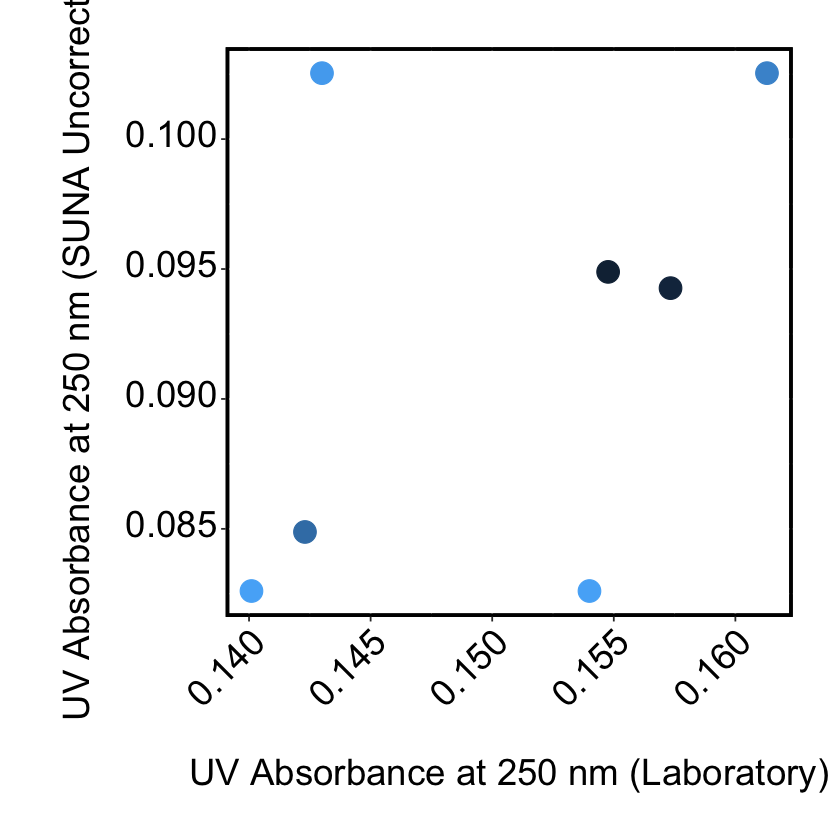

`geom_smooth()` using formula 'y ~ x'



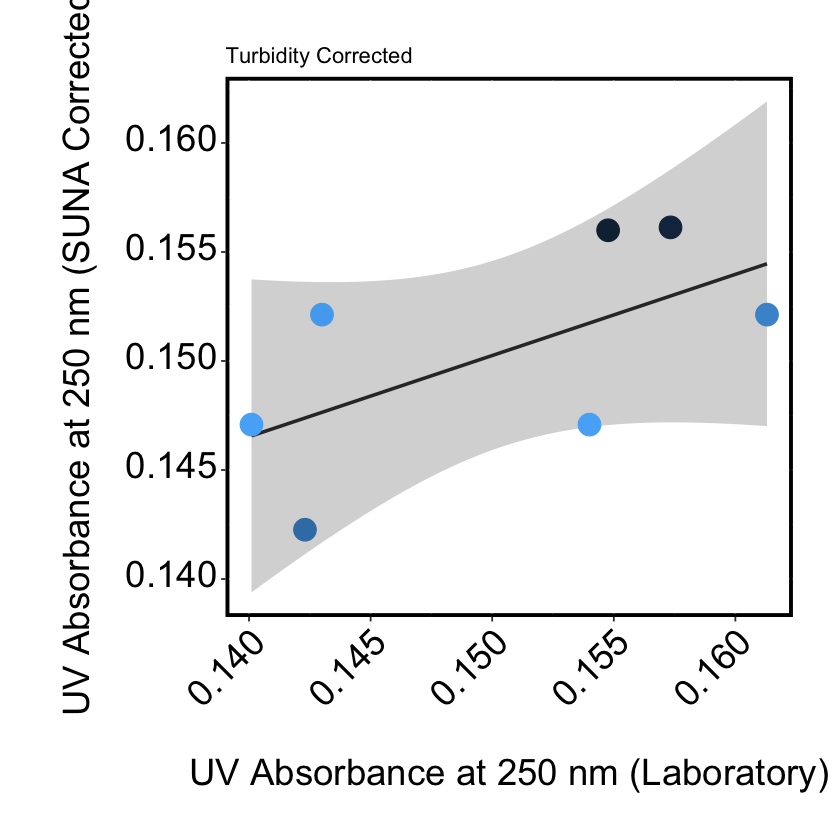

In [37]:
suna_grab$interp_254_log<-log10(suna_grab$interp_254_c254.mean)
suna_grab$turb_log<-log10(suna_grab$turbidity.mean)


summary(lm(uva_250_lab~interp_254_log*turb_log,suna_grab))
summary(lm(uva_250_lab~interp_254_c254.mean*turb_log,suna_grab))

summary(lm(uva_250_lab~interp_254_c254.mean,suna_grab))
summary(lm(uva_250_lab~interp_254_tcorr_log,suna_grab))

suna_grab$interp_254_tcorr<-predict(lm(uva_250_lab~interp_254_c254.mean*turbidity.mean,suna_grab))
suna_grab$interp_254_tcorr_log<-predict(lm(uva_250_lab~interp_254_log*turbidity.mean,suna_grab))
suna_grab$interp_254_tcorr_log_turb<-predict(lm(uva_250_lab~interp_254_log*turb_log,suna_grab))


ggplot(suna_grab,aes(uva_250_lab,interp_254_c254.mean,color=pH.mean))+
theme_ts_space+
xlab("\nUV Absorbance at 250 nm (Laboratory)")+
ylab("UV Absorbance at 250 nm (SUNA Uncorrected)\n")+
geom_point(size=6)

ggsave("~/neon_suna/plots/CRAM_250_uncorrected.pdf",width = 20, height = 20, units = "cm")



ggplot(suna_grab,aes(uva_250_lab,interp_254_tcorr_log,color=pH.mean))+
theme_ts_space+
geom_smooth(method="lm",color="grey20")+
xlab("\nUV Absorbance at 250 nm (Laboratory)")+
ylab("UV Absorbance at 250 nm (SUNA Corrected)\n")+
geom_point(size=6)+
ggtitle("Turbidity Corrected")

ggsave("~/neon_suna/plots/CRAM_250_corrected.pdf",width = 20, height = 20, units = "cm")



#summary(lm(uva_250_lab~interp_254_c254.mean*turbidity.mean+sensor_temp.mean,suna_grab))
#summary(lm(uva_280_lab~interp_280_c350.mean*turbidity.mean+sensor_temp.mean,suna_grab))
#summary(lm(uva_280_lab~interp_280_c254.mean*turbidity.mean+sensor_temp.mean,suna_grab))

In [38]:
summary(lm(uva_250_lab~interp_254_c254.mean*turb_log,suna_grab))
summary(lm(uva_250_lab~interp_254_tcorr_log*turb_log,suna_grab))



Call:
lm(formula = uva_250_lab ~ interp_254_c254.mean * turb_log, data = suna_grab)

Residuals:
         1          2          5          6          7          8          9 
-9.120e-03  9.180e-03 -6.976e-03  6.924e-03  1.120e-03 -1.167e-03  4.072e-05 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)
(Intercept)                    0.05589    0.11458   0.488    0.659
interp_254_c254.mean           0.93849    1.13614   0.826    0.469
turb_log                       0.03840    0.29337   0.131    0.904
interp_254_c254.mean:turb_log -0.83752    3.10733  -0.270    0.805

Residual standard error: 0.009428 on 3 degrees of freedom
Multiple R-squared:  0.3731,	Adjusted R-squared:  -0.2538 
F-statistic: 0.5951 on 3 and 3 DF,  p-value: 0.6598



Call:
lm(formula = uva_250_lab ~ interp_254_tcorr_log * turb_log, data = suna_grab)

Residuals:
         1          2          5          6          7          8          9 
-9.066e-03  9.234e-03 -6.916e-03  6.984e-03  1.124e-03 -1.280e-03 -8.111e-05 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)
(Intercept)                    0.007482   0.375165   0.020    0.985
interp_254_tcorr_log           0.950420   2.482523   0.383    0.727
turb_log                       0.028825   1.367138   0.021    0.985
interp_254_tcorr_log:turb_log -0.192072   9.102116  -0.021    0.984

Residual standard error: 0.009433 on 3 degrees of freedom
Multiple R-squared:  0.3724,	Adjusted R-squared:  -0.2552 
F-statistic: 0.5933 on 3 and 3 DF,  p-value: 0.6607


In [ ]:
names(CRAM_sw)

# Apply turbidity correction based on lab samples.

In [39]:
cor_cols<-grep("^interp_",names(CRAM_sw))

uva_250_turb_lm<-lm(uva_250_lab~interp_254_log*turbidity.mean,suna_grab)

for(i in 1:length(cor_cols)){
	prepdata<-data.frame(interp_254_log=log10(CRAM_sw[,cor_cols[i]]),turbidity.mean=CRAM_sw$turbidity.mean)
	turb_cor_pred<-predict(uva_250_turb_lm,newdata=prepdata)
	CRAM_sw[,c(paste(names(CRAM_sw)[cor_cols[i]],"_turb",sep=""))]<-turb_cor_pred
}



Warning message in data.frame(interp_254_log = log10(CRAM_sw[, cor_cols[i]]), turbidity.mean = CRAM_sw$turbidity.mean):
“NaNs produced”
Warning message in data.frame(interp_254_log = log10(CRAM_sw[, cor_cols[i]]), turbidity.mean = CRAM_sw$turbidity.mean):
“NaNs produced”
Warning message in data.frame(interp_254_log = log10(CRAM_sw[, cor_cols[i]]), turbidity.mean = CRAM_sw$turbidity.mean):
“NaNs produced”
Warning message in data.frame(interp_254_log = log10(CRAM_sw[, cor_cols[i]]), turbidity.mean = CRAM_sw$turbidity.mean):
“NaNs produced”
Warning message in data.frame(interp_254_log = log10(CRAM_sw[, cor_cols[i]]), turbidity.mean = CRAM_sw$turbidity.mean):
“NaNs produced”
Warning message in data.frame(interp_254_log = log10(CRAM_sw[, cor_cols[i]]), turbidity.mean = CRAM_sw$turbidity.mean):
“NaNs produced”
Warning message in data.frame(interp_254_log = log10(CRAM_sw[, cor_cols[i]]), turbidity.mean = CRAM_sw$turbidity.mean):
“NaNs produced”
Warning message in data.frame(interp_254_log = l

In [53]:
head(CRAM_sw)

,dtpr,nitrate.mean,nitrate_mgl.mean,a254.mean,a350.mean,sensor_temp.mean,interp_189.mean,interp_190.mean,interp_191.mean,interp_192.mean,⋯,interp_390_c350.mean_turb,interp_390_c254.mean_turb,interp_391_c350.mean_turb,interp_391_c254.mean_turb,interp_392_c350.mean_turb,interp_392_c254.mean_turb,interp_393_c350.mean_turb,interp_393_c254.mean_turb,interp_394_c350.mean_turb,interp_394_c254.mean_turb
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-01-08 19:30:00,2.269474,0.03177895,0.030600,0.009947368,21.59474,-17.68421,-9.2418389,0.07489879,0.8640148,⋯,0.3934182,-0.3858297,0.3779549,-0.3983568,0.3569602,-0.4153810,0.3491274,-0.4217314,0.3224715,-0.4433886
2,2019-01-08 19:45:00,2.013500,0.02820500,0.034780,0.013360000,19.40000,-12.96000,-0.7108862,1.38049450,0.2811695,⋯,0.2621142,-0.4924953,0.2498961,-0.5024702,0.2382157,-0.5120059,0.2226134,-0.5247705,0.1857241,-0.5549568
3,2019-01-08 20:00:00,1.727000,0.02417000,0.036340,0.014170000,18.77000,-1.92000,5.4961301,2.00824174,0.8098182,⋯,0.2478869,-0.5300765,0.2341478,-0.5413047,0.2144877,-0.5573934,0.2056298,-0.5646446,0.1780517,-0.5872388
4,2019-01-08 20:15:00,1.489500,0.02084500,0.037275,0.014665000,18.50500,9.12000,11.8073056,2.20082416,0.6668090,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2019-01-08 20:30:00,1.276500,0.01789500,0.036935,0.013875000,18.39000,-8.16000,0.6518625,1.40164834,1.2685619,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2019-01-08 20:45:00,1.112500,0.01559000,0.037460,0.014060000,18.38000,-14.88000,-4.0682822,0.65851648,0.5088470,⋯,0.2577620,-0.4815034,0.2452705,-0.4916954,0.2283832,-0.5054961,0.2161321,-0.5155081,0.1834061,-0.5422968


In [40]:
CRAM_swt_0<-CRAM_sw[,grep("*_turb$",names(CRAM_sw))]
CRAM_swt<-bind_cols(CRAM_sw[,c("dtpr","nitrate.mean","nitrate_mgl.mean","a254.mean","a350.mean","sensor_temp.mean","specificConductance.mean","dissolvedOxygen.mean","pH.mean","chlorophyll.mean","turbidity.mean","fDOM.mean")],CRAM_swt_0)





# Adding PAR data.

In [41]:
CRAM_par<-loadByProduct(dpID="DP1.20042.001",site="CRAM",check.size=F)
saveRDS(CRAM_par,paste(getwd(),"/CRAM_par.rds",sep=""))
CRAM_par<-readRDS(paste(getwd(),"/CRAM_par.rds",sep=""))




Finding available files
  |======================================================================| 100%

  |======================================================================| 100%

Unpacking zip files using 1 cores.
Stacking operation across a single core.
Stacking table PARWS_1min
Stacking table PARWS_5min
Stacking table PARWS_30min
Merged the most recent publication of sensor position files for each site and saved to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 3 data tables and 2 metadata tables!
Stacking took 3.095121 secs


In [64]:
#lubridate::round_date(CRAM_parts$dtp, "15 minutes")
#getwd()
#CRAM_swt$dtpr

[1] "/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/LIRO_2019"

In [42]:

CRAM_parts<-CRAM_par$PARWS_5min
CRAM_parts$dtp<-CRAM_parts$startDateTime
#str(CRAM_wqk)



CRAM_parts$dtpr<-lubridate::round_date(CRAM_parts$dtp, "15 minutes")
CRAM_parts_red<-summaryBy(PARMean~dtpr,CRAM_parts,FUN=c(mean))
head(CRAM_parts_red)
#str(CRAM_wq_red)

CRAM_swtpar<-merge(CRAM_swt,CRAM_parts_red,by="dtpr",all.x=TRUE)



saveRDS(CRAM_swtpar,paste(save,"/SUNA_PAR/","/CRAM_SUNA_PAR.rds",sep=""))


,dtpr,PARMean.mean
,<dttm>,<dbl>
1,2017-09-11 00:00:00,29.7400000
2,2017-09-11 00:15:00,11.3233333
3,2017-09-11 00:30:00,1.8300000
4,2017-09-11 00:45:00,0.1433333
5,2017-09-11 01:00:00,0.0000000
6,2017-09-11 01:15:00,0.0000000


[1] 16539  1455

In [ ]:

str(CRAM_swtpar$dtpr)

attr(CRAM_swtpar$dtpr,"tzone") <- "Etc/GMT+5"

str(CRAM_swtpar$dtpr)
CRAM_swtpar$date<-as.Date(CRAM_swtpar$dtpr,tz="Etc/GMT+5")

CRAM_dates<-unique(CRAM_swtpar$date)

for(i in 1:length(CRAM_dates)){
    
    
}

In [ ]:

#CRAMd<-subset(CRAM_swtpar,date==as.Date("2019-06-10"))
CRAMd<-CRAM_swtpar

CRAMdk<-CRAMd[,grep("*c254.mean_turb$",names(CRAMd))]
CRAMdk$dtpr<-CRAMd$dtpr

CRAMdm<-subset(melt(CRAMdk,id.vars=c("dtpr")),!is.na(value))
CRAMdm$wavelength<-gsub("interp_","",CRAMdm$variable,fixed=TRUE)
CRAMdm$wavelength<-as.numeric(gsub("_c254.mean_turb","",CRAMdm$wavelength,fixed=TRUE))



str(CRAMdm)

# Trying some ridge plots to look at wavelength changes over time.
So far not looCRAM super great.

In [ ]:
#library(ggridges)
#scales::rescale(height)
#CRAMdm$dtprn<-scales::rescale(as.numeric(CRAMdm$dtpr))
#CRAMdm$abs<-scales::rescale(as.numeric(CRAMdm$value))


#ggplot(subset(CRAMdm,wavelength>=275&wavelength<=295),aes(x = wavelength, y = dtprn, group=dtprn,height = abs)) +
#  geom_ridgeline(fill="grey80",alpha=0.6)

#ggsave("~/neon_suna/plots/CRAMdm_ridge.pdf",width = 20, height = 40, units = "cm")


# Calculating spectral slope 275-295nm on each time step.

In [ ]:
names(CRAMd)
names(CRAMdm)

In [ ]:
ssm_275_295<-subset(CRAMdm,wavelength>=275&wavelength<=295)
dtps<-unique(ssm_275_295$dtpr)
pb <- progress_bar$new(
	format = "  downloading [:bar] :percent eta: :eta",
	total = length(dtps), clear = FALSE, width= 60)
s275295_comp<-data.frame()


for(i in 1:length(dtps)){
	ssm_now<-subset(ssm_275_295,dtpr==dtps[i])
	
	ssm_now$am1<-ssm_now$value*100*2.3025851
	ssm_now$lnam1<-log(ssm_now$am1)


	if(sum(!is.na(ssm_now$lnam1))>2){
		s275295<-lm(ssm_now$lnam1~ssm_now$wavelength)$coefficients[2]*-1
		}else{s275295<-NA}
		s275295_temp<-data.frame(dtpr=dtps[i],s275295=s275295)
		s275295_comp<-bind_rows(s275295_comp,s275295_temp)
#		pb$tick()
}	
	


In [ ]:
ggplot(subset(ssm_275_295,variable=="interp_275_c254.mean_turb"),aes(dtpr,value))+geom_point()


In [ ]:
ssm_275_295<-subset(CRAMdm,wavelength>=275&wavelength<=295)
dtps<-unique(ssm_275_295$dtpr)
pb <- progress_bar$new(
	format = "  downloading [:bar] :percent eta: :eta",
	total = length(dtps), clear = FALSE, width= 60)
s275295_comp<-data.frame()



	ssm_now<-subset(ssm_275_295,dtpr==dtps[i])
	
	ssm_now$am1<-ssm_now$value*100*2.3025851
	ssm_now$lnam1<-log(ssm_now$am1)


	if(sum(!is.na(ssm_now$lnam1))>2){
		s275295<-lm(ssm_now$lnam1~ssm_now$wavelength)$coefficients[2]*-1
		}else{s275295<-NA}
		s275295_temp<-data.frame(dtpr=dtps[i],s275295=s275295)
		s275295_comp<-bind_rows(s275295_comp,s275295_temp)
#		pb$tick()


In [ ]:
nrow(s275295_comp)
nrow(CRAM_swtpar)
CRAM_swtp_ss<-merge(CRAM_swtpar,s275295_comp,by="dtpr",all.x=TRUE)
saveRDS(CRAM_swtp_ss,paste(data,"CRAM_swtp_ss.rds",sep=""))

In [ ]:
sdates<-unique(as.Date(CRAM_swtp_ss$dtpr,tz="Etc/GMT+5"))

i<-5
comp_df<-data.frame()
#print(i)
start<-as.POSIXct(paste(sdates[i]-1,"22:00",tz="Etc/GMT+5"))
finish<-as.POSIXct(paste(sdates[i]+1,"03:00",tz="Etc/GMT+5"))
CRAMday<-subset(CRAM_swtp_ss,dtpr>=start & dtpr<=finish)
CRAMday<-subset(CRAMday,!is.na(PARMean.mean) & !is.na(s275295))
nrow(CRAMday)
    CRAMday$PAR_roll<-as.numeric(c("NA",rollmean(CRAMday$PARMean.mean,k=3,align=c("center"),na.fill=TRUE),"NA"))
    CRAMday$s275295_roll<-as.numeric(c("NA",rollmean(CRAMday$s275295,k=3,align=c("center"),na.fill=TRUE),"NA"))



    CRAM_night<-subset(CRAMday,PARMean.mean<200)
    night_s275295<-mean(CRAM_night$s275295,na.rm=TRUE)

    
    #CRAMday$baseline<-predict(lm(s275295~dtpr,CRAM_night),CRAMday)
    CRAMday$baseline_roll<-predict(lm(s275295_roll~dtpr,CRAM_night),CRAMday)    
    CRAMday$s275295_bs<-CRAMday$s275295_roll-CRAMday$baseline_roll    
    
    CRAM_night_am<-subset(CRAM_night,hour(dtpr)<=12)
    night_s275295_am<-mean(CRAM_night_am$s275295,na.rm=TRUE)
    
    CRAM_night_pm<-subset(CRAM_night,hour(dtpr)>12)
    night_s275295_pm<-mean(CRAM_night_pm$s275295,na.rm=TRUE)
    
    CRAM_day<-subset(CRAMday,PARMean.mean>=10)
    day_s275295<-mean(CRAM_day$s275295,na.rm=TRUE)

    day_s275295_base_sum<-sum(CRAM_day$s275295_bs,na.rm=TRUE)
    day_PAR_roll_base_sum<-sum(CRAM_day$PAR_roll,na.rm=TRUE)    

    int<-lm(s275295_bs~PAR_roll,CRAM_day)$coef[1]
    slope<-lm(s275295_bs~PAR_roll,CRAM_day)$coef[2]    
    
    CRAM_n_am_time<-nrow(CRAM_night_am)
    CRAM_n_pm_time<-nrow(CRAM_night_pm)
    CRAM_d_time<-nrow(CRAM_day)
    
    temp_df<-data.frame(site="CRAM",date=sdates[i],night_s275295=night_s275295,night_s275295_am=night_s275295_am,night_s275295_pm=night_s275295_pm,day_s275295=day_s275295,day_s275295_base_sum=day_s275295_base_sum,day_PAR_roll_base_sum=day_PAR_roll_base_sum,int=int,slope=slope,CRAM_n_am_time=CRAM_n_am_time,CRAM_n_pm_time=CRAM_n_pm_time,CRAM_d_time=CRAM_d_time)

# Extracting spectral daily slope ratio discrepancy.

In [ ]:
sdates<-unique(as.Date(CRAM_swtp_ss$dtpr,tz="Etc/GMT+5"))

#i<-30
comp_df<-data.frame()
for(i in 1:length(sdates)){
#print(i)
start<-as.POSIXct(paste(sdates[i]-1,"22:00",tz="Etc/GMT+5"))
finish<-as.POSIXct(paste(sdates[i]+1,"03:00",tz="Etc/GMT+5"))
CRAMday<-subset(CRAM_swtp_ss,dtpr>=start & dtpr<=finish)
CRAMday<-subset(CRAMday,!is.na(PARMean.mean) & !is.na(s275295))

if(nrow(CRAMday)>80){
    CRAMday$PAR_roll<-as.numeric(c("NA",rollmean(CRAMday$PARMean.mean,k=3,align=c("center"),na.fill=TRUE),"NA"))
    CRAMday$s275295_roll<-as.numeric(c("NA",rollmean(CRAMday$s275295,k=3,align=c("center"),na.fill=TRUE),"NA"))



    CRAM_night<-subset(CRAMday,PARMean.mean<200)
    night_s275295<-mean(CRAM_night$s275295,na.rm=TRUE)
    
    #CRAMday$baseline<-predict(lm(s275295~dtpr,CRAM_night),CRAMday)
    CRAMday$baseline_roll<-predict(lm(s275295_roll~dtpr,CRAM_night),CRAMday)    
    CRAMday$s275295_bs<-CRAMday$s275295_roll-CRAMday$baseline_roll    
    
    CRAM_night_am<-subset(CRAM_night,hour(dtpr)<=12)
    night_s275295_am<-mean(CRAM_night_am$s275295,na.rm=TRUE)
    
    CRAM_night_pm<-subset(CRAM_night,hour(dtpr)>12)
    night_s275295_pm<-mean(CRAM_night_pm$s275295,na.rm=TRUE)
    
    CRAM_day<-subset(CRAMday,PARMean.mean>=10)
    day_s275295<-mean(CRAM_day$s275295,na.rm=TRUE)

    day_s275295_base_sum<-sum(CRAM_day$s275295_bs,na.rm=TRUE)
    day_PAR_roll_base_sum<-sum(CRAM_day$PAR_roll,na.rm=TRUE)    

    int<-lm(s275295_bs~PAR_roll,CRAM_day)$coef[1]
    slope<-lm(s275295_bs~PAR_roll,CRAM_day)$coef[2]    
    
    CRAM_n_am_time<-nrow(CRAM_night_am)
    CRAM_n_pm_time<-nrow(CRAM_night_pm)
    CRAM_d_time<-nrow(CRAM_day)
    
    temp_df<-data.frame(site="CRAM",date=sdates[i],night_s275295=night_s275295,night_s275295_am=night_s275295_am,night_s275295_pm=night_s275295_pm,day_s275295=day_s275295,day_s275295_base_sum=day_s275295_base_sum,day_PAR_roll_base_sum=day_PAR_roll_base_sum,int=int,slope=slope,CRAM_n_am_time=CRAM_n_am_time,CRAM_n_pm_time=CRAM_n_pm_time,CRAM_d_time=CRAM_d_time)
    comp_df<-bind_rows(comp_df,temp_df)
    }
}




In [ ]:
nrow(comp_df)
head(comp_df)

In [ ]:
    CRAM_day$s275295_bs
ggplot(comp_df,aes(date,day_s275295_base_sum))+
       geom_point(size=2)
ggplot(comp_df,aes(date,day_PAR_roll_base_sum))+
       geom_point(size=2)


ggplot(comp_df,aes(day_PAR_roll_base_sum,day_s275295_base_sum))+
geom_point()


saveRDS(comp_df,paste(data,"comp_df_CRAM.rds",sep=""))

In [ ]:
CRAMday<-subset(CRAM_swtp_ss,as.Date(dtpr,tz="Etc/GMT+5")==as.Date("2019-06-11",tz="Etc/GMT+5"))
nrow(CRAMday)

str(CRAMday$s275295)



ggplot(CRAMday,aes(dtpr,s275295))+
geom_point()


ggplot(CRAMday,aes(dtpr,PARMean.mean))+
geom_point()

ggplot(CRAMday,aes(dtpr,PARMean.mean))+
geom_point()

